In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sc
import sklearn as sk

from math import sqrt, log, exp


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets,metrics, neighbors
from sklearn.metrics import pairwise_distances, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist
from scipy import stats

I - Presentation
I.A - Dataset Comprehension

In [2]:
redwine = pd.read_csv("content/winequality-red.csv",sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
whitewine = pd.read_csv("content/winequality-white.csv",sep=";")
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print("Nombre d'échantillons de vin blanc:", whitewine.shape[0])
print("Nombre d'échantillons de vin rouge:", redwine.shape[0])

Nombre d'échantillons de vin blanc: 4898
Nombre d'échantillons de vin rouge: 1599


In [5]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
all_wines = pd.concat([redwine,whitewine])

I.B - Data treatment - Missing values

In [8]:
print("Données manquante pour all_wine:")
print(all_wines.isnull().sum())

Données manquante pour all_wine:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


I.C - Primary Analysis

Text(0, 0.5, 'Nombre de vins')

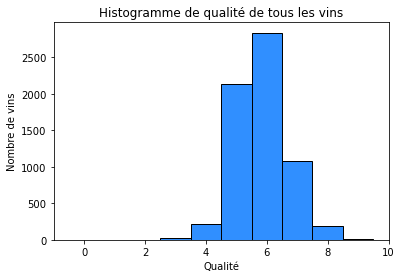

In [9]:
plt.hist(all_wines["quality"], edgecolor = "black", color = '#308fff', bins=range(0,11), align="left")
plt.title("Histogramme de qualité de tous les vins")
plt.xlabel("Qualité")
plt.ylabel("Nombre de vins")

Text(0, 0.5, 'Nombre de vins')

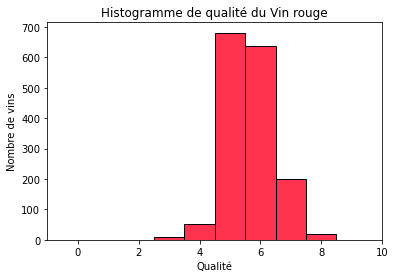

In [10]:
plt.hist(redwine["quality"], edgecolor = "black", color = '#ff334e', bins=range(0,11), align="left")
plt.title("Histogramme de qualité du Vin rouge")
plt.xlabel("Qualité")
plt.ylabel("Nombre de vins")

Text(0, 0.5, 'Nombre de vins')

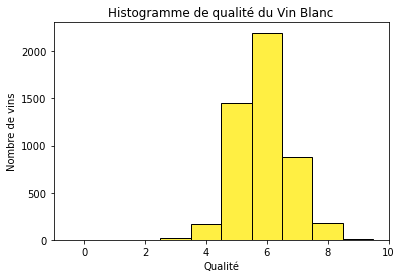

In [11]:
plt.hist(whitewine["quality"], edgecolor = "black", color = '#ffef43', bins=range(0,11), align="left")
plt.title("Histogramme de qualité du Vin Blanc")
plt.xlabel("Qualité")
plt.ylabel("Nombre de vins")

In [26]:
ratio_white = whitewine["quality"].value_counts(normalize='True')
for i in range(0,ratio_white.shape[0]):
    print("Les vins de qualité",ratio_white.index[i],"representent : ",round(ratio_white.values[i]*100,2),"% du dataset")

Les vins de qualité 6 representent :  45.42 % du dataset
Les vins de qualité 5 representent :  29.17 % du dataset
Les vins de qualité 7 representent :  19.06 % du dataset
Les vins de qualité 8 representent :  3.59 % du dataset
Les vins de qualité 4 representent :  2.76 % du dataset


In [27]:
ratio_red = redwine["quality"].value_counts(normalize='True')
for i in range(0,ratio_red.shape[0]):
    print("Les vins de qualité",ratio_red.index[i],"representent :",round(ratio_red.values[i]*100,2),"% du dataset")

Les vins de qualité 5 representent : 42.52 % du dataset
Les vins de qualité 6 representent : 40.39 % du dataset
Les vins de qualité 7 representent : 12.75 % du dataset
Les vins de qualité 4 representent : 3.24 % du dataset
Les vins de qualité 8 representent : 1.1 % du dataset


In [28]:
ratio_allwine = all_wines["quality"].value_counts(normalize='True')
for i in range(0,ratio_allwine.shape[0]):
    print("Les vins de qualité",ratio_allwine.index[i],"representent :",round(ratio_allwine.values[i]*100,2),"% du dataset")

Les vins de qualité 6 representent : 43.65 % du dataset
Les vins de qualité 5 representent : 32.91 % du dataset
Les vins de qualité 7 representent : 16.61 % du dataset
Les vins de qualité 4 representent : 3.32 % du dataset
Les vins de qualité 8 representent : 2.97 % du dataset
Les vins de qualité 3 representent : 0.46 % du dataset
Les vins de qualité 9 representent : 0.08 % du dataset


In [15]:
zsc_r = np.abs(stats.zscore(redwine))
zsc_w = np.abs(stats.zscore(whitewine))
zsc_a = np.abs(stats.zscore(all_wines))
Z_redwine = redwine[(zsc_r<3).all(axis=1)]
Z_whitewine = whitewine[(zsc_w<3).all(axis=1)]
Z_all_wines = all_wines[(zsc_a<3).all(axis=1)]
print("On a",Z_redwine.shape[0]," d'échantillons de vin rouge avec un zscore > 3, ce qui fait",redwine.shape[0]-Z_redwine.shape[0],"echantillons de moins.")
print("On a",Z_whitewine.shape[0]," d'échantillons de vin blanc avec un zscore > 3, ce qui fait",whitewine.shape[0]-Z_whitewine.shape[0],"echantillons de moins.")
print("On a",Z_all_wines.shape[0]," d'échantillons de tous les vins avec un zscore > 3, ce qui fait",all_wines.shape[0]-Z_all_wines.shape[0],"echantillons de moins.")

On a 1451  d'échantillons de vin rouge avec un zscore > 3, ce qui fait 148 echantillons de moins.
On a 4487  d'échantillons de vin blanc avec un zscore > 3, ce qui fait 411 echantillons de moins.
On a 5989  d'échantillons de tous les vins avec un zscore > 3, ce qui fait 508 echantillons de moins.


II - Observation
II.A - Analysis of quality depending on attributes

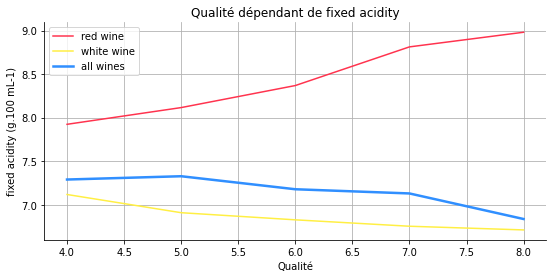

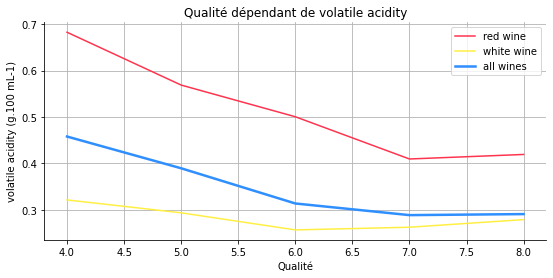

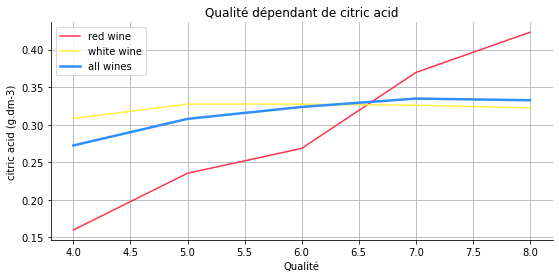

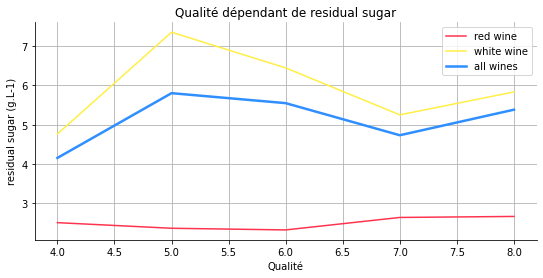

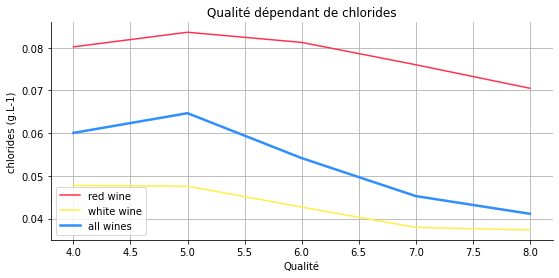

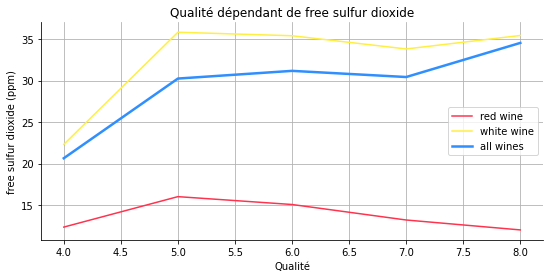

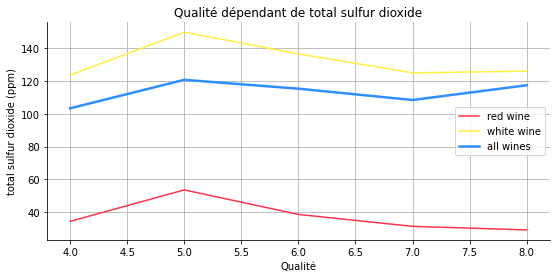

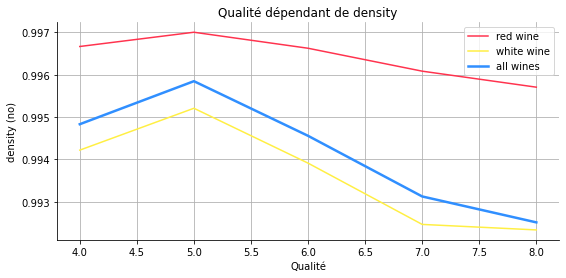

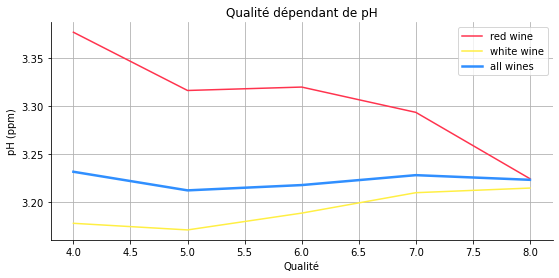

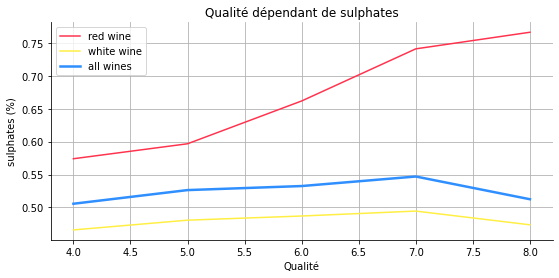

In [40]:
att_u = zip(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],["g.100 mL-1","g.100 mL-1","g.dm-3","g.L-1","g.L-1","ppm","ppm","no","ppm","%"])
for attribute, unit in att_u:
    redwineQ = redwine[["quality",attribute]]
    whitewineQ = whitewine[["quality",attribute]]
    allwinesQ = all_wines[["quality",attribute]]
    allwinesQ = allwinesQ[allwinesQ["quality"]>=min(redwine["quality"])] ##On notera que l'on affiche seulement les qualité comprise entre 8 et 4 compris (sois le max et min) pour avoir un affichage cohérant
    allwinesQ = allwinesQ[allwinesQ["quality"]<=max(redwine["quality"])]
    #We plot the quality depending on the choosen attribute
    fig = plt.figure(figsize = (9,4))
    redwineQ_plot, =plt.plot(redwineQ.groupby(["quality"]).mean(), color='#ff334e')
    whitewineQ_plot, =plt.plot(whitewineQ.groupby(["quality"]).mean(), color='#ffef43')
    allwinesQ_plot, =plt.plot(allwinesQ.groupby(["quality"]).mean(), color='#308fff',linewidth=2.5)
    
    #Plot
    title = "Qualité dépendant de " + attribute
    ytitle = attribute + " (" + unit + ")"
    plt.legend([redwineQ_plot, whitewineQ_plot, allwinesQ_plot], ['red wine', 'white wine', 'all wines'])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xlabel("Qualité")
    plt.ylabel(ytitle)
    plt.title(title)
    plt.grid()

II.B - Boxplots d on attributes

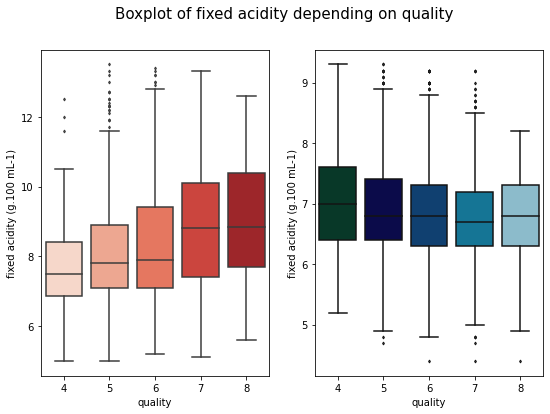

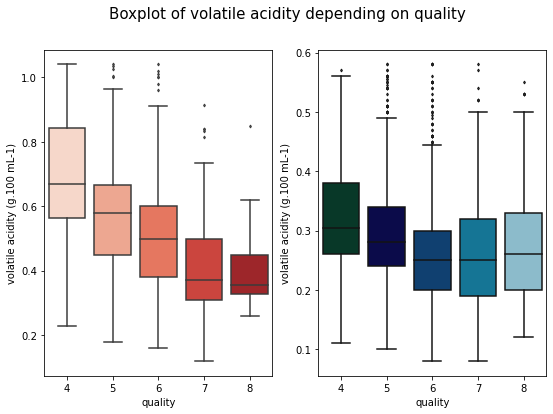

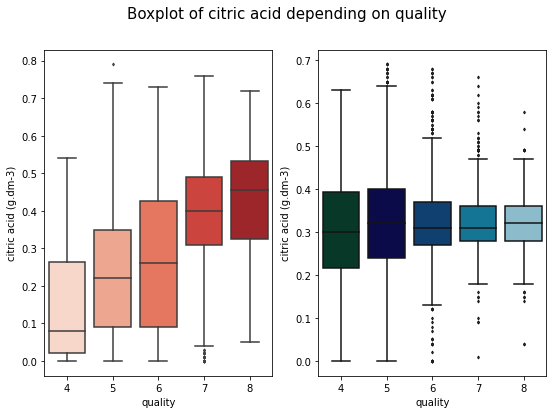

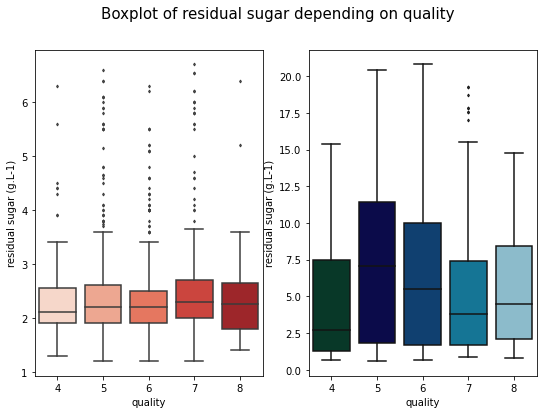

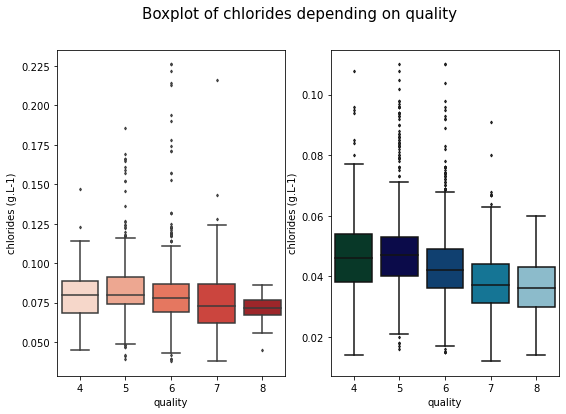

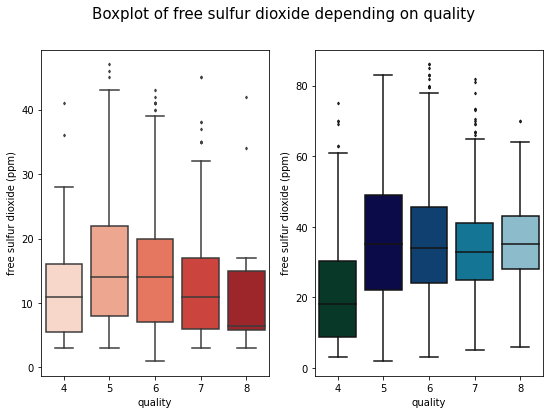

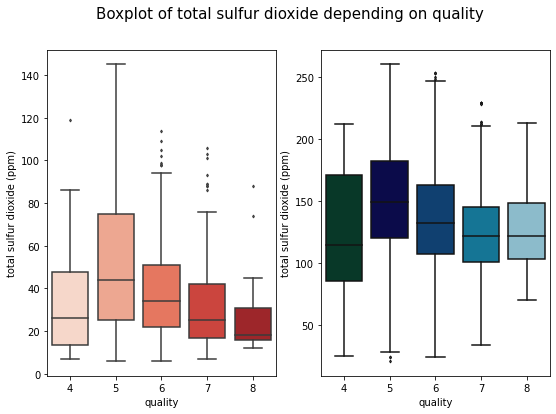

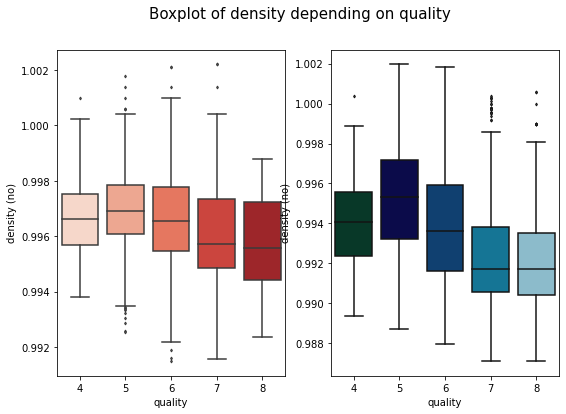

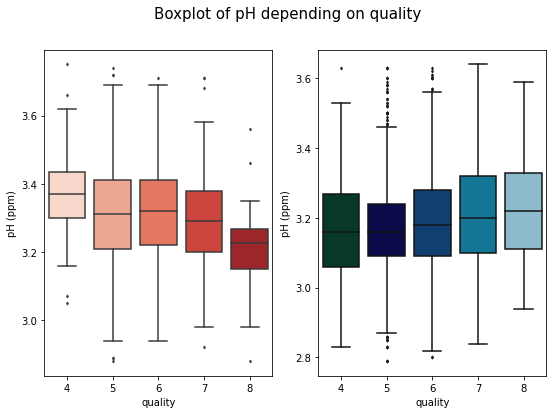

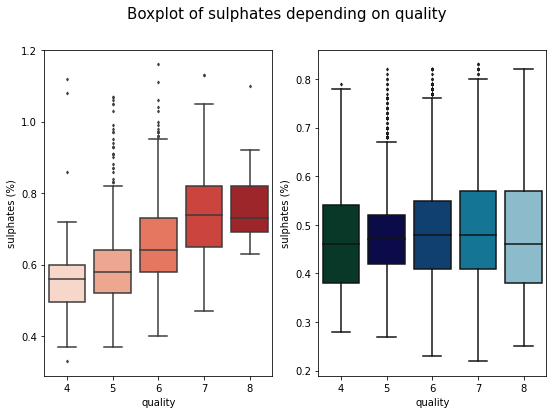

In [41]:
att_u = zip(["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],["g.100 mL-1","g.100 mL-1","g.dm-3","g.L-1","g.L-1","ppm","ppm","no","ppm","%"])
for attribute, unit in att_u:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    sns.boxplot(x='quality', y=attribute, data = redwine, palette='Reds', ax=axes[0], flierprops = dict(markerfacecolor = '0.50', markersize = 2)).set(ylabel= attribute + " (" + unit + ")")
    sns.boxplot(x='quality', y=attribute, data = whitewine, palette='ocean', ax=axes[1], flierprops = dict(markerfacecolor = '0.50', markersize = 2)).set(ylabel=attribute + " (" + unit + ")")
    fig.suptitle(t= 'Boxplot of '+ attribute +" depending on quality", fontsize=15)

II.C - Corrélation entre attributs

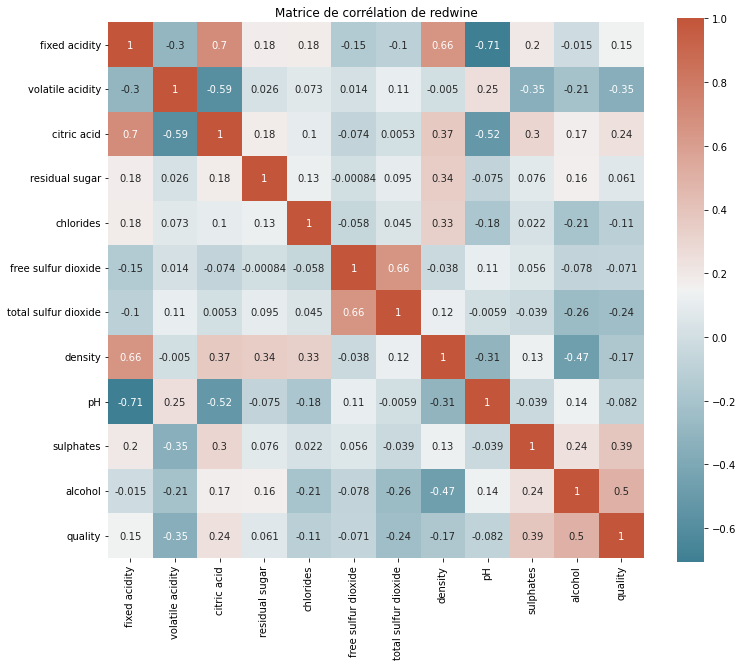

In [19]:
corr_red = redwine.corr()
_,ax=plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,20,as_cmap=True)
corr_red_map=sns.heatmap(corr_red, cmap = cmap,square=True, ax=ax, annot = True).set(title='Matrice de corrélation de redwine')

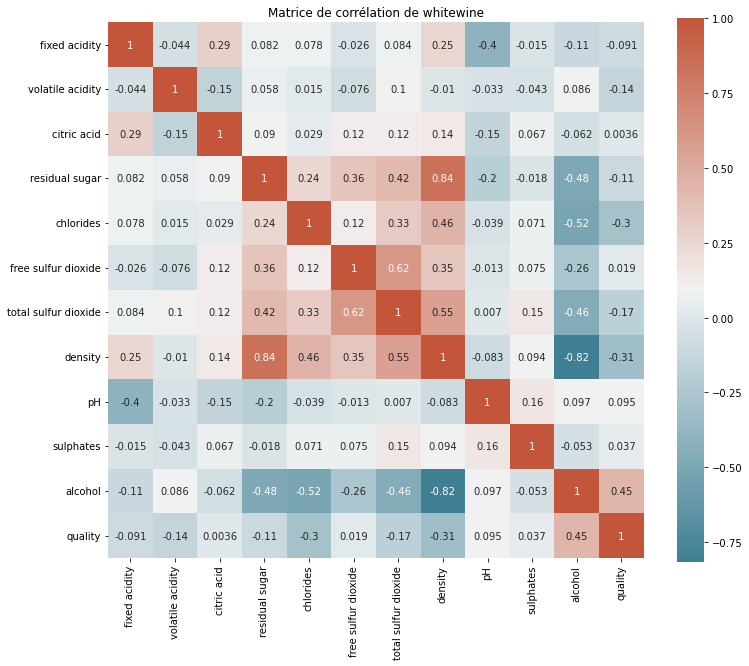

In [20]:
corr_white = whitewine.corr()
_,ax=plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,20,as_cmap=True)
corr_white_map=sns.heatmap(corr_white, cmap = cmap,square=True, ax=ax, annot = True).set(title='Matrice de corrélation de whitewine')

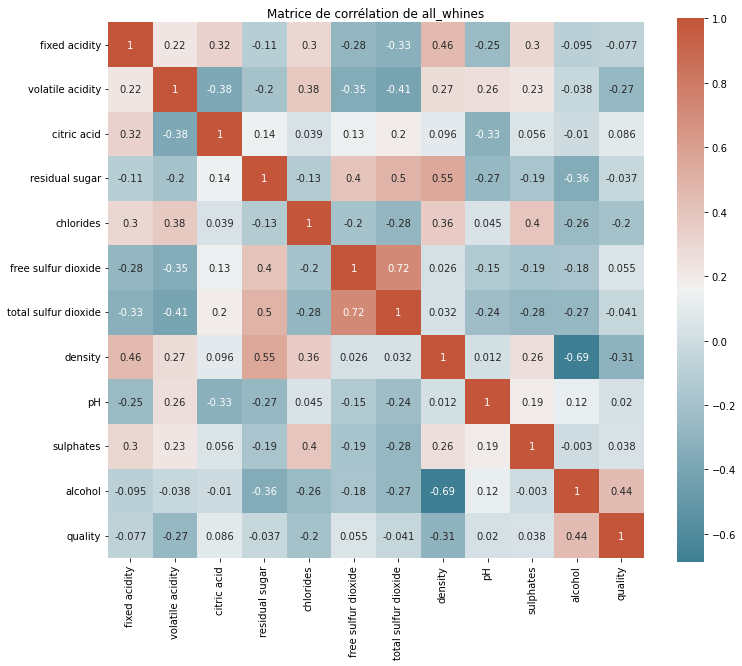

In [21]:
corr_all = all_wines.corr()
_,ax=plt.subplots(figsize=(12,10))
cmap = sns.diverging_palette(220,20,as_cmap=True)
corr_all_map=sns.heatmap(corr_all, cmap = cmap,square=True, ax=ax, annot = True).set(title='Matrice de corrélation de all_whines')

In [22]:
print(corr_red["quality"],"\n")
print(corr_white["quality"],"\n")
print(corr_all["quality"],"\n")
###afficher les trois tableaux sans la derniere ligne : quality car par pertinant

fixed acidity           0.145163
volatile acidity       -0.353443
citric acid             0.243999
residual sugar          0.061482
chlorides              -0.108787
free sulfur dioxide    -0.071202
total sulfur dioxide   -0.237745
density                -0.167568
pH                     -0.082164
sulphates               0.386567
alcohol                 0.501501
quality                 1.000000
Name: quality, dtype: float64 

fixed acidity          -0.091097
volatile acidity       -0.141278
citric acid             0.003629
residual sugar         -0.105612
chlorides              -0.295800
free sulfur dioxide     0.019293
total sulfur dioxide   -0.171196
density                -0.314034
pH                      0.094761
sulphates               0.037146
alcohol                 0.445076
quality                 1.000000
Name: quality, dtype: float64 

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides   

III - Classification
III.A - PCA 2 components

/Users/Ruben/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Ruben/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


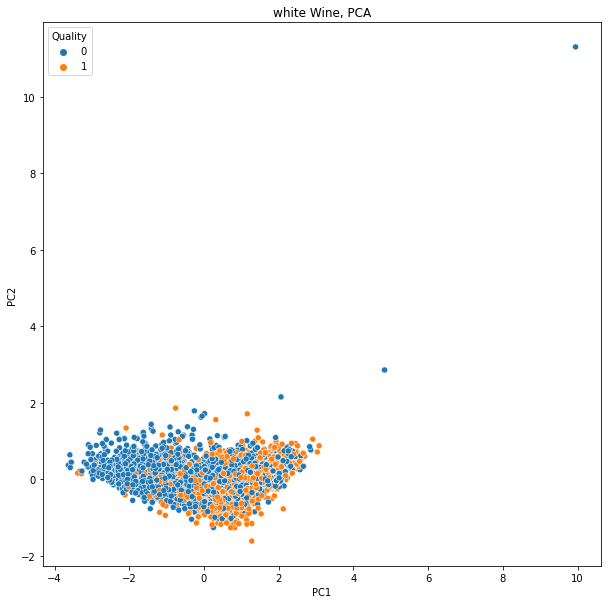

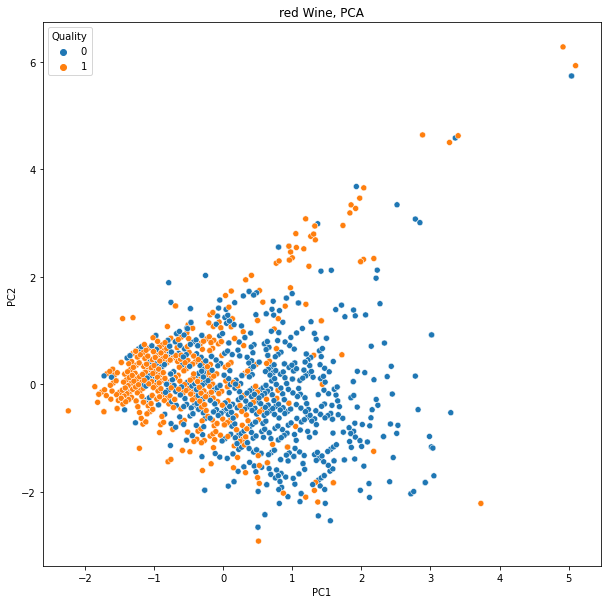

In [90]:
white = pd.read_csv("content/winequality-white.csv",  sep=";")
red = pd.read_csv("content/winequality-red.csv",  sep=";")

whiteQual=white["quality"]
whiteQualBin = []
for i in range (len(whiteQual)):
    if whiteQual[i] < 6:
        whiteQualBin.append(1)
    else:
        whiteQualBin.append(0)
whiteQualBin = pd.DataFrame(whiteQualBin, columns=['Quality'])

RedQual=red['quality']
RedQualBin = []
for i in range (len(RedQual)):
    if RedQual[i] < 6:
        RedQualBin.append(1)
    else:
        RedQualBin.append(0)
RedQualBin = pd.DataFrame(RedQualBin, columns=['Quality'])   

scaler = StandardScaler()
white_scal= scaler.fit_transform(white[["density","alcohol"]])  #### dire qu'on utilise ces deux attribut car ceux sont les deux plus corrélé d'apres la matrix de corrélation
scaler = StandardScaler()
red_scal= scaler.fit_transform(red[["sulphates","alcohol"]])

pca = PCA(n_components=2)
data_proj = pca.fit_transform(white_scal)
labels = ["PC1", "PC2"]
data_proj = pd.DataFrame(data_proj,index=white.index,columns=labels)
f, axes = plt.subplots(1, 1, figsize=(10,10))
sns.scatterplot(data_proj.PC1, data_proj.PC2, hue = whiteQualBin['Quality']).set_title('white Wine, PCA');

pca = PCA(n_components=2)
data_proj = pca.fit_transform(red_scal)
labels = ["PC1", "PC2"]
data_proj = pd.DataFrame(data_proj,index=red.index,columns=labels)
f, axes = plt.subplots(1, 1, figsize=(10,10))
sns.scatterplot(data_proj.PC1, data_proj.PC2, hue = RedQualBin['Quality']).set_title('red Wine, PCA');

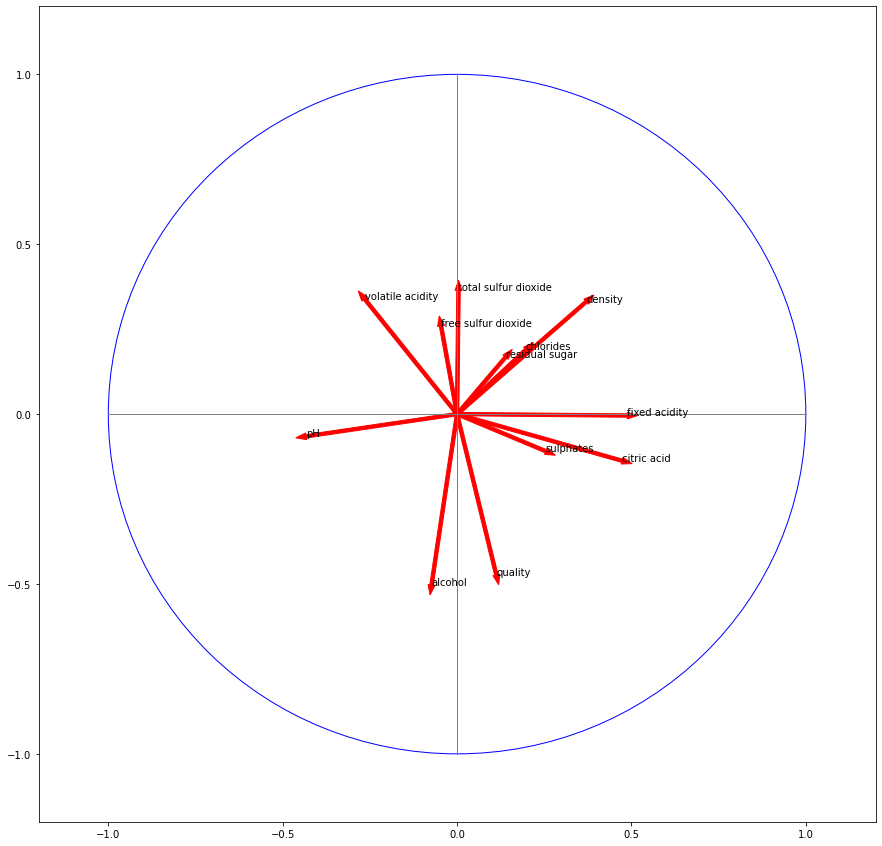

In [84]:
red = StandardScaler().fit_transform(red)
pca = PCA(n_components=2)
data_proj = pca.fit_transform(red)
loadings = pca.components_.T
fig, axis = plt.subplots(figsize=(15,15))
axis.set_xlim(-1.2,1.2)
axis.set_ylim(-1.2,1.2)
plt.plot([-1,1],[0,0],color="grey", linestyle="-",linewidth=1)
plt.plot([0,0],[-1,1],color="grey", linestyle="-",linewidth=1)
for j in range(0,12):
   plt.arrow(0,0,loadings[j,0],loadings[j,1],head_width = 0.02, width=0.01,color="red")  #nous affichons l'axe de chaque dimension dans le nouveau plan 
   plt.annotate(redwine.columns[j], (loadings[j,0],loadings[j,1]))
cercle = plt.Circle((0,0),1,color='blue', fill = False)
axis.add_artist(cercle)  #nous ajoutons le cercle de corrélation 

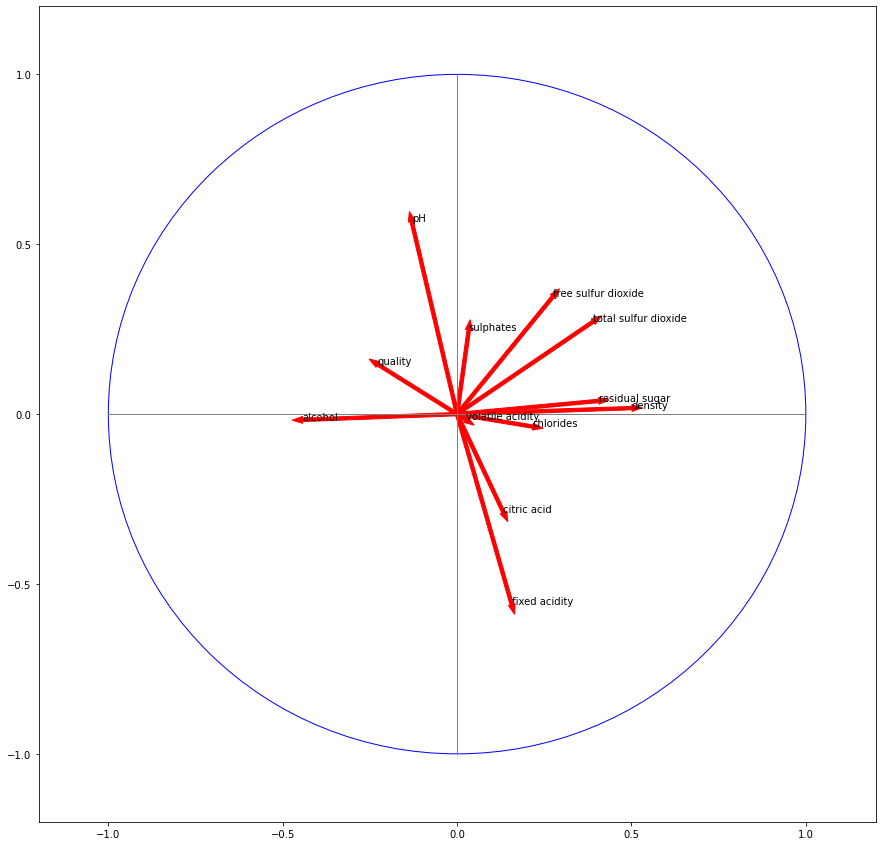

In [88]:
white = StandardScaler().fit_transform(white)
pca = PCA(n_components=2)
data_proj = pca.fit_transform(white)
loadings = pca.components_.T
fig, axis = plt.subplots(figsize=(15,15))
axis.set_xlim(-1.2,1.2)
axis.set_ylim(-1.2,1.2)
plt.plot([-1,1],[0,0],color="grey", linestyle="-",linewidth=1)
plt.plot([0,0],[-1,1],color="grey", linestyle="-",linewidth=1)
for j in range(0,12):
   plt.arrow(0,0,loadings[j,0],loadings[j,1],head_width = 0.02, width=0.01,color="red")  #nous affichons l'axe de chaque dimension dans le nouveau plan 
   plt.annotate(whitewine.columns[j], (loadings[j,0],loadings[j,1]))
cercle = plt.Circle((0,0),1,color='blue', fill = False)
axis.add_artist(cercle)  #nous ajoutons le cercle de corrélation 

III.C - Chi-squared test
III.D - Cramer's V

IV - Predictions

A - Decision tree

In [54]:
redwine['goodquality'] = [1 if x >= 7 else 0 for x in redwine['quality']]
whitewine['goodquality'] = [1 if x >= 7 else 0 for x in whitewine['quality']]
X_red = redwine.drop(['quality','goodquality'], axis = 1)
y_red = redwine['goodquality']
X_white = whitewine.drop(['quality','goodquality'], axis = 1)
y_white = whitewine['goodquality']
X_red_features = X_red
X_red = StandardScaler().fit_transform(X_red)
X_red_features = X_red
X_white = StandardScaler().fit_transform(X_white)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=.25, random_state=0)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=.25, random_state=0)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       309
           1       0.55      0.50      0.52        54

    accuracy                           0.87       363
   macro avg       0.73      0.71      0.72       363
weighted avg       0.86      0.87      0.86       363



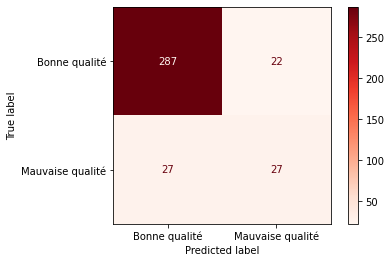

In [59]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_red_train, y_red_train)
y_treePred = tree_model.predict(X_red_test)
print(classification_report(y_red_test, y_treePred))
plot_confusion_matrix(tree_model,X_red_test,y_red_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       875
           1       0.59      0.65      0.62       247

    accuracy                           0.83      1122
   macro avg       0.75      0.76      0.75      1122
weighted avg       0.83      0.83      0.83      1122



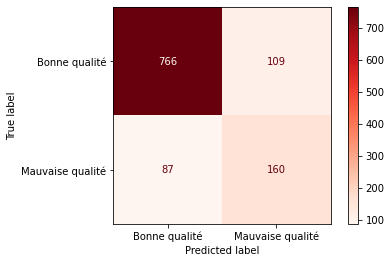

In [60]:
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_white_train, y_white_train)
y_treePred = tree_model.predict(X_white_test)
print(classification_report(y_white_test, y_treePred))
plot_confusion_matrix(tree_model,X_white_test,y_white_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

B - Naive Bayes

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       309
           1       0.42      0.57      0.48        54

    accuracy                           0.82       363
   macro avg       0.67      0.72      0.69       363
weighted avg       0.85      0.82      0.83       363



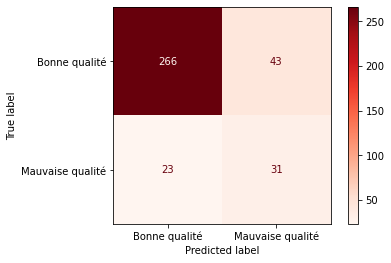

In [62]:
NB_model = GaussianNB()
NB_model.fit(X_red_train, y_red_train)
y_nbPred =NB_model.predict(X_red_test) 
print(classification_report(y_red_test, y_nbPred))
plot_confusion_matrix(NB_model,X_red_test,y_red_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       875
           1       0.44      0.63      0.52       247

    accuracy                           0.74      1122
   macro avg       0.66      0.70      0.67      1122
weighted avg       0.78      0.74      0.76      1122



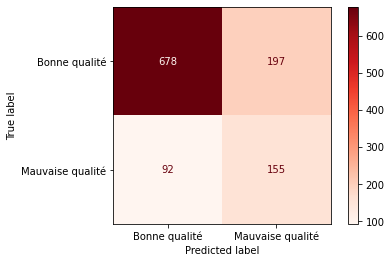

In [63]:
NB_model = GaussianNB()
NB_model.fit(X_white_train, y_white_train)
y_nbPred =NB_model.predict(X_white_test) 
print(classification_report(y_white_test, y_nbPred))
plot_confusion_matrix(NB_model,X_white_test,y_white_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

C - K Nearest Neighbors

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       875
           1       0.60      0.47      0.53       247

    accuracy                           0.81      1122
   macro avg       0.73      0.69      0.71      1122
weighted avg       0.80      0.81      0.81      1122



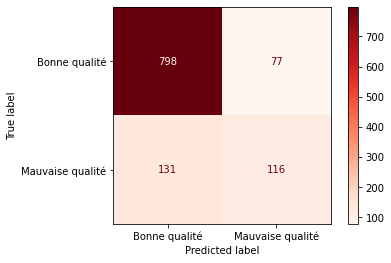

In [65]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_white_train,y_white_train)
y_knnPred=knn_model.predict(X_white_test)
print(classification_report(y_white_test, y_knnPred))
plot_confusion_matrix(knn_model,X_white_test,y_white_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       309
           1       0.52      0.31      0.39        54

    accuracy                           0.85       363
   macro avg       0.70      0.63      0.65       363
weighted avg       0.83      0.85      0.84       363



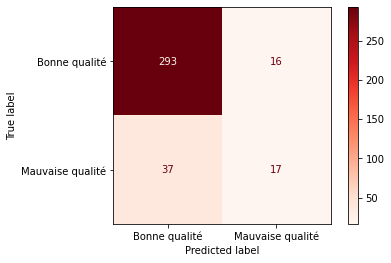

In [66]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_red_train,y_red_train)
y_knnPred=knn_model.predict(X_red_test)
print(classification_report(y_red_test, y_knnPred))
plot_confusion_matrix(knn_model,X_red_test,y_red_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

D - Logistic Regression

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       309
           1       0.56      0.37      0.44        54

    accuracy                           0.86       363
   macro avg       0.73      0.66      0.68       363
weighted avg       0.85      0.86      0.85       363



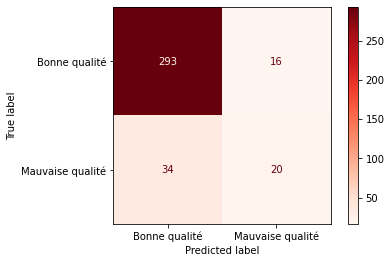

In [70]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_red_train, y_red_train)
y_logRegPred=log_reg_model.predict(X_red_test)
print(classification_report(y_red_test, y_logRegPred))
plot_confusion_matrix(log_reg_model,X_red_test,y_red_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       875
           1       0.52      0.26      0.35       247

    accuracy                           0.78      1122
   macro avg       0.67      0.60      0.61      1122
weighted avg       0.75      0.78      0.76      1122



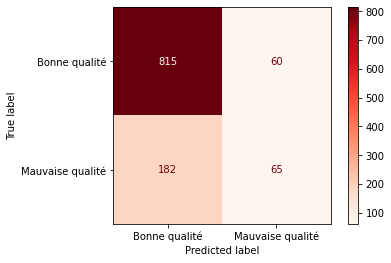

In [69]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_white_train, y_white_train)
y_logRegPred=log_reg_model.predict(X_white_test)
print(classification_report(y_white_test, y_logRegPred))
plot_confusion_matrix(log_reg_model,X_white_test,y_white_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

E - Random forest

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       309
           1       0.75      0.56      0.64        54

    accuracy                           0.91       363
   macro avg       0.84      0.76      0.79       363
weighted avg       0.90      0.91      0.90       363



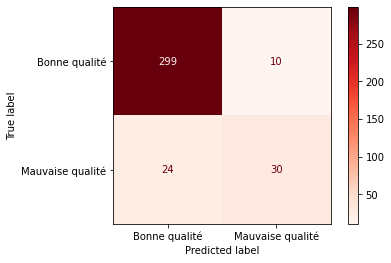

In [86]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_red_train, y_red_train)
y_randomForestPred = random_forest.predict(X_red_test)
print(classification_report(y_red_test, y_randomForestPred))
plot_confusion_matrix(random_forest,X_red_test,y_red_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       875
           1       0.75      0.57      0.65       247

    accuracy                           0.86      1122
   macro avg       0.82      0.76      0.78      1122
weighted avg       0.86      0.86      0.86      1122



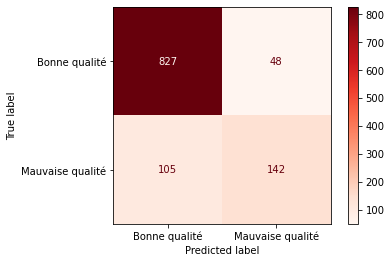

In [85]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_white_train, y_white_train)
y_randomForestPred = random_forest.predict(X_white_test)
print(classification_report(y_white_test, y_randomForestPred))
plot_confusion_matrix(random_forest,X_white_test,y_white_test,normalize = None,display_labels = ['Bonne qualité', 'Mauvaise qualité'],cmap ='Reds')